In [36]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2020-6-04 20:12:13
MODIFIED: 2021-11-01 01:48:45
"""

import os
import numpy as np

# -*- coding:utf-8 -*-
from acl_model import Model
from PIL import Image, ImageDraw, ImageFont

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
device_id = 0
model_path = "model/None-ResNet-None-CTC.om"
character = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [39]:
model = Model(device_id, model_path, character)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success[Model] class Model release source success
[ACL] class Sample release source success

model input size 1
input  0
model input dims ({'name': 'input', 'dimCount': 4, 'dims': [1, 1, 32, 100]}, 0)
model input datatype 0
model output size 1
output  0
model output dims ({'name': 'Add_78:0', 'dimCount': 3, 'dims': [1, 26, 37]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [40]:
path_dict = {'img_path': "data/test2.jpg", 
                     'boxes_path': "data/res_test2.txt", 
                     'output_path': "results/"}

In [41]:
bboxes = model.run(path_dict)

[INFO] reading text boxes . . .
[INFO]  11 text boxes found.
[INFO] recognizing texts . . .
[PreProc] image_np_expanded shape: (1, 1, 32, 100)
[ACL] img_host_ptr, img_buf_size:  93829035683696 12800
[ACL] img_dev_ptr, img_buf_size:  18143029968896 12800
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[PreProc] image_np_expanded shape: (1, 1, 32, 100)
[ACL] img_host_ptr, img_buf_size:  93829028799664 12800
[ACL] img_dev_ptr, img_buf_size:  18143029968896 12800
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[PreProc] image_np_expanded shape: (1, 1, 32, 100)
[ACL] img_host_ptr, img_buf_size:  93829035683696 12800
[ACL] img_dev_ptr, img_buf_size:  18143029968896 12800
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[PreProc] image_np_expande

In [42]:
img = Image.open(path_dict['img_path'])

In [43]:
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("data/fonts/OpenSans_Condensed-SemiBold.ttf", 18)
s = ""

for b in bboxes:
    points = b.get_points()
    arry_points = tuple(map(tuple, np.array(points).astype("int32").reshape([-1, 4, 2])[0]))
    draw.polygon(arry_points, outline="red")
    draw.text((points[0], points[1]-20), b.get_text(), font=font, fill='green')
    s+=b.get_text() + " "

[Model] class Model release source success
[ACL] class Sample release source success
[Model] class Model release source success
[ACL] class Sample release source success
[Model] class Model release source success
[ACL] class Sample release source success
[Model] class Model release source success
[ACL] class Sample release source success


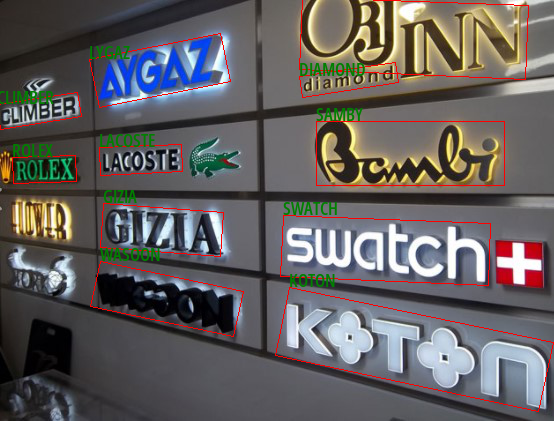

In [44]:
# show output image
img

In [45]:
# show output texts
print("[Result] image texts :",s)

[Result] image texts : LYGAZ OINN DIAMOND CLIMBER LACOSTE SAMBY ROLEX GIZIA SWATCH WASOON KOTON 


In [46]:
# save results 
filename, _ = os.path.splitext(os.path.basename(path_dict['img_path']))
res_file_without_ext = path_dict['output_path'] + "res_" + filename
res_txt_file = res_file_without_ext + '.txt'
res_img_file = res_file_without_ext + '.jpg'

with open(res_txt_file, 'w') as f:
    for b in bboxes:
        f.writelines(str(b) + '\n')
        
img.save(res_img_file)